In [21]:
# Import Dependencies
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [52]:
# Use Pandas data frame to read csv data and read the first data
enrollment_df1 = pd.read_csv("enrollmentByYear_for_BubblePlot.csv")
employment_df1 = pd.read_csv("employment_df_for_BubblePlot.csv")
completion_df1 = pd.read_csv("ComprehensiveData_2005-17_v1.csv")

## Enrollment data

In [51]:
enrollment_df1.head()

,year,EF2001D1.Grand total
0,2001,17965501.0
1,2002,18774604.0
2,2003,19385482.0
3,2004,19493543.0
4,2005,19792638.0


In [53]:
# Rename
enrollment_df2 = enrollment_df1.rename(columns = {"EF2001D1.Grand total":"Total Enrollment"})
enrollment_df2.head()

,year,Total Enrollment
0,2001,17965501.0
1,2002,18774604.0
2,2003,19385482.0
3,2004,19493543.0
4,2005,19792638.0


## Employment data

In [32]:
# find Column names in Employment data set
employment_df1.columns

Index(['Unnamed: 0', 'Year', 'Initial Jobless Claims', 'Unemployment Rate',
       'Labor Force Participation', 'Unemployment Annual Rate of Change',
       'Participation Annual Rate of Change',
       'Jobless Claims Annual Rate of Change'],
      dtype='object')

In [39]:
# Select Desired Columns in Employment data set
employment_df2 = employment_df1[['Year','Initial Jobless Claims']]
employment_df2.head()

,Year,Initial Jobless Claims
0,2000,346000
1,2001,405246
2,2002,404283
3,2003,402154
4,2004,342117


In [67]:
# Rename
employment_df3 = employment_df2.rename(columns = {"Year":"year", "Initial Jobless Claims":"Total Unemployment"})
employment_df3.head()

,year,Total Unemployment
0,2000,346000
1,2001,405246
2,2002,404283
3,2003,402154
4,2004,342117


## Completion data

In [40]:
# find Column names in Completion data set
completion_df1.columns

Index(['unitid', 'institution name', 'year', 'DFR2005.Associate's degree',
       'DFR2005.Bachelor's degree', 'DFR2005.Master's degree',
       'DFR2005.Certificates of less-than 1-year',
       'DFR2005.Certificates of 1 but less than 2 years', 'Unnamed: 8'],
      dtype='object')

In [42]:
# Select Desired Columns in Completion data set
completion_df2 = completion_df1[["year","DFR2005.Bachelor's degree"]]
completion_df2.head()

,year,DFR2005.Bachelor's degree
0,2005.0,600.0
1,2005.0,1622.0
2,2005.0,798.0
3,2005.0,2931.0
4,2005.0,3917.0


In [62]:
completion_df3 = completion_df2.dropna(how='any')
completion_df3.head()

,year,DFR2005.Bachelor's degree
0,2005.0,600.0
1,2005.0,1622.0
2,2005.0,798.0
3,2005.0,2931.0
4,2005.0,3917.0


In [84]:
#COMPLETION: Rename
completion_df3 = completion_df2.rename(columns = {"DFR2005.Bachelor's degree":"Bachelor's Degree"})
completion_df3.head()

,year,Bachelor's Degree
0,2005.0,600.0
1,2005.0,1622.0
2,2005.0,798.0
3,2005.0,2931.0
4,2005.0,3917.0


In [100]:
completion_df4 = completion_df3.groupby(["year"])["Bachelor's Degree"].sum().astype(int)
completion_df4.head()

year
2005.0    1316168
2006.0    1347340
2007.0    1373060
2008.0    1404895
2009.0    1433088
Name: Bachelor's Degree, dtype: int32

In [101]:
# store data from data series to data frame
completion_df4 = pd.DataFrame({'year':completion_df4.index, "Total Completion":completion_df4.values})
completion_df4.head()

,year,Total Completion
0,2005.0,1316168
1,2006.0,1347340
2,2007.0,1373060
3,2008.0,1404895
4,2009.0,1433088


## Combine dataset

In [116]:
combined_df = pd.merge(pd.merge(employment_df3, enrollment_df2, on="year"), completion_df4, on="year")
combined_df

,year,Total Unemployment,Total Enrollment,Total Completion
0,2005,330988,19792638.0,1316168
1,2006,312092,19957444.0,1347340
2,2007,320683,20240347.0,1373060
3,2008,417708,20714313.0,1404895
4,2009,574279,21913240.0,1433088
5,2010,458808,23155497.0,1467433
6,2011,408679,23766408.0,1511783
7,2012,374863,23767003.0,1565139
8,2013,343625,23436250.0,1587285
9,2014,308342,23508832.0,1611376


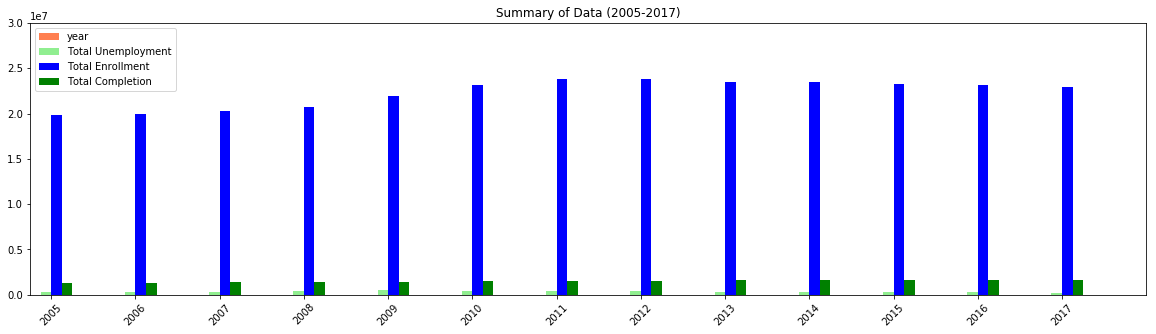

<Figure size 432x288 with 0 Axes>

In [121]:
multi_plot = combined_df.plot(kind="bar", figsize=(20,5), color=['coral', 'lightgreen', 'blue', 'green'])
multi_plot.set_xticklabels(summary_df["year"], rotation=45)
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, 30000000)
plt.title("Summary of Data (2005-2017)")

plt.savefig("Summary of Data (2005-2017)")
plt.show()
plt.tight_layout()

In [115]:
# selecting city type from combined_df for bubble plots
#  type_A = combined_df.loc[combined_df['type'] == 'A']
#  type_B = combined_df.loc[combined_df['type'] == 'B']
#  type_C = combined_df.loc[combined_df['type'] == 'C']

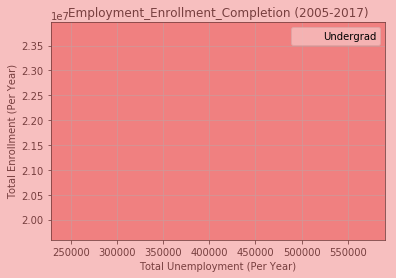

In [106]:
# #Bubble Plot axises: Gold, Light Sky Blue, and Light Coral

# v1 = combined_df.plot(kind='scatter',x='Total Unemployment', y='Total Enrollment',
#                        color='lightcoral', s=combined_df['Total Completion']*5, label = 'Undergrad', 
#                        alpha = 0.5, edgecolor = "black", linewidths = 1)

# v2 = type_suburban.plot(kind='scatter', x='total_rides', y='average_fare', 
#                            color='lightskyblue',s=combined_df['driver_count']*5, label = 'Suburban', 
#                            alpha = 0.5, edgecolor = "black", linewidths = 1, ax=v1)  

# v3 = type_rural.plot(kind='scatter', x='total_rides', y='average_fare', 
#                         color='gold', s=combined_df['driver_count']*5, label = 'Rural', 
#                         alpha = 0.5, edgecolor = "black", linewidths = 1, ax=v1)

# plt.grid()
# plt.title("Employment_Enrollment_Completion (2005-2017)")
# plt.xlabel("Total Unemployment (Per Year)")
# plt.ylabel("Total Enrollment (Per Year)")
# plt.savefig("Bubbleplot_gp1.png")
# plt.show()
#plt.text("Note: Circle size correlates with driver count per city", (combined_df.iloc[:,1]))
